In [1]:
import omicverse as ov
import scanpy as sc
ov.plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.9, Tutorials: https://omicverse.readthedocs.io/
Dependency error: The 'bioservices' distribution was not found and is required by the application


In [3]:
adata = sc.read_h5ad('/media/zhy/zhyfile/1111/1110_epi.h5ad')

In [5]:
%%time
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=2000,)
adata

Begin robust gene identification
After filtration, 25627/25627 genes are kept.     Among 25627 genes, 25627 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell. The following highly-expressed genes are not considered during normalization factor computation:
['Hbb-b1', 'Hba-a2', 'Mt-atp6']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
Time to analyze data in cpu: 18.60634732246399 seconds.
End of size normalization: shiftlog and HVGs selection pearson
CPU times: user 27.5 s, sys: 1.99 s, total: 29.4 s
Wall time: 19 s


AnnData object with n_obs × n_vars = 15235 × 25627
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'scDblFinder_score', 'scDblFinder_class', 'batch', '_scvi_batch', '_scvi_labels', 'leiden_scVI1', 'celltype.main'
    var: 'gene', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg'
    obsm: 'X_umap'
    layers: 'counts'

In [6]:
results =  ov.single.cytotrace2(adata,
    use_model_dir="/media/zhy/zhyfile/17_models_weights",
    species="mouse",
    batch_size = 10000,
    smooth_batch_size = 1000,
    disable_parallelization = False,
    max_cores = None,
    max_pcs = 200,
    seed = 14,
    output_dir = 'cytotrace2_results'
)

cytotrace2: Input parameters
    Species: mouse
    Parallelization enabled: True
    User-provided limit for number of cores to use: None
    Batch size: 10000
    Smoothing batch size: 1000
    Max PCs: 200
    Seed: 14
    Output directory: cytotrace2_results
cytotrace2: Dataset characteristics
    Number of input genes:  25627
    Number of input cells:  15235
cytotrace2: Preprocessing
cytotrace2: 64 cores detected
cytotrace2: Running 2 prediction batch(es) in parallel using 10 cores for smoothing per batch.
cytotrace2: Initiated processing batch 1/2 with 7618 cells
cytotrace2: Initiated processing batch 2/2 with 7617 cells
    12873 input genes are present in the model features.
    12873 input genes are present in the model features.

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____

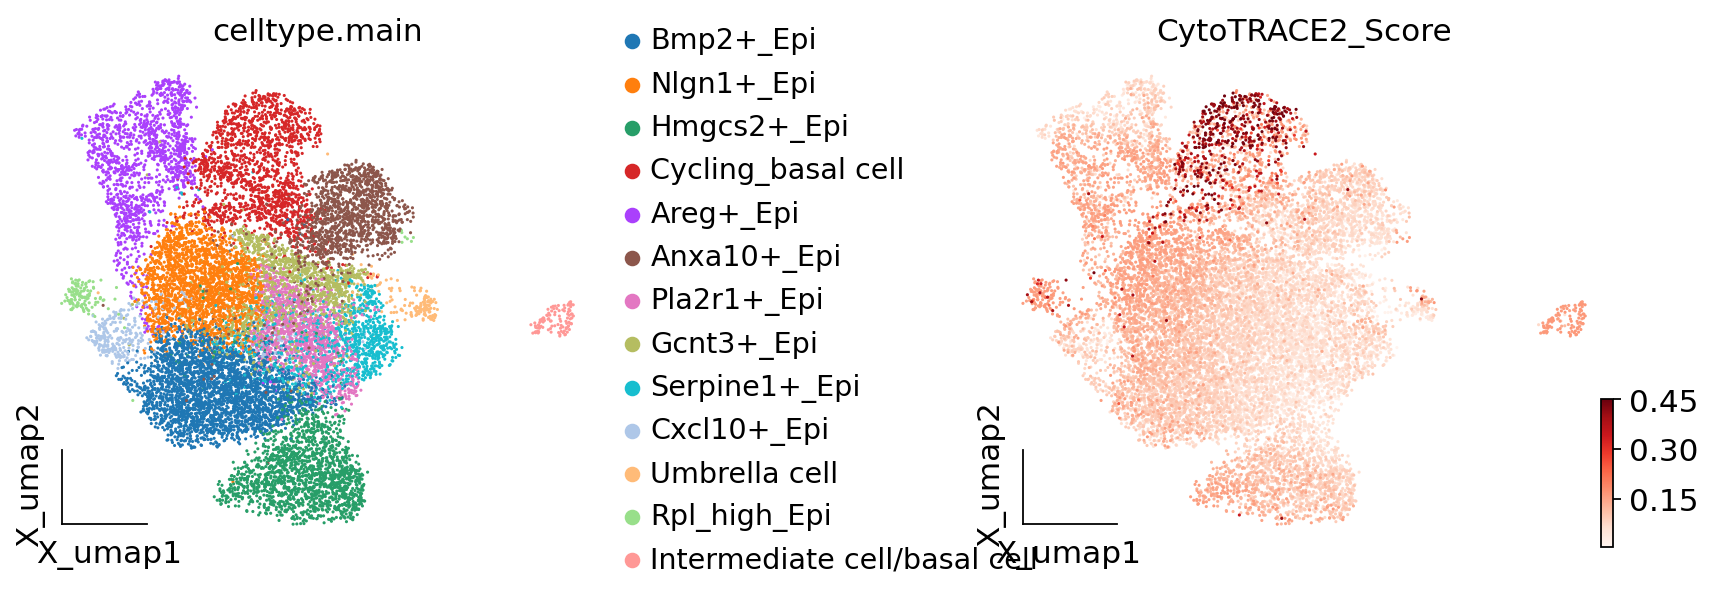

In [10]:
ov.utils.embedding(adata,basis='X_umap',
                   color=['celltype.main','CytoTRACE2_Score'],
                   frameon='small',cmap='Reds',wspace=0.55,save='cytotrace2_results/celltype_score.pdf')

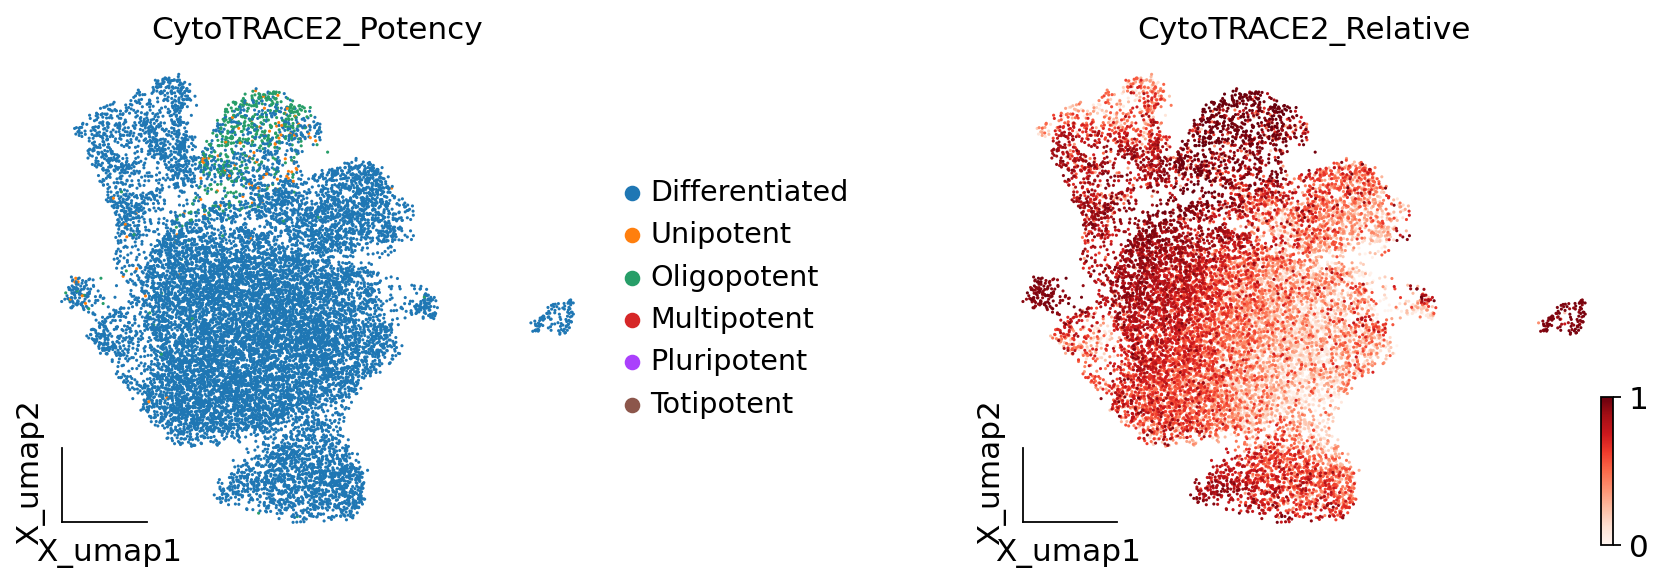

In [11]:
ov.utils.embedding(adata,basis='X_umap',
                   color=['CytoTRACE2_Potency','CytoTRACE2_Relative'],
                   frameon='small',cmap='Reds',wspace=0.55,save='cytotrace2_results/celltype_categorical.pdf')